TODO I could also use enums

In [28]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import vanet_tools as vp
import logging

In [30]:
df = pd.read_csv("sumo_out.csv",delimiter=";").dropna()
MICROCLOUD_RANGE=100

In [31]:
simulator = vp.Simulator(df)

In [32]:
coordinates = df[['vehicle_x','vehicle_y']]

In [33]:
coords_x,coords_y = coordinates['vehicle_x'],coordinates['vehicle_y']

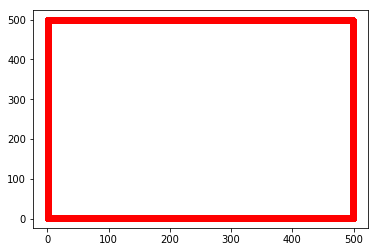

In [34]:
plt.scatter(coords_x,coords_y,c='red')
plt.show()

In [35]:
NUM_MICROCLOUDS = 5

In [36]:
microclouds_coords = vp.create_coords(coordinates,MICROCLOUD_RANGE,num_microclouds=9)

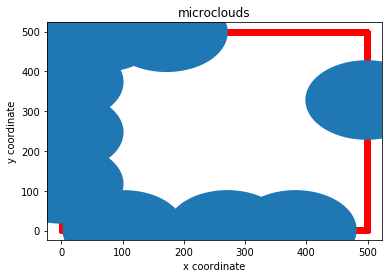

In [37]:
vp.plot_microclouds(microclouds_coords,MICROCLOUD_RANGE,coords_x,coords_y)

In [38]:
config_file = "box_config.csv"

In [39]:
vp.store_microcloud_config(microclouds_coords,config_file)

In [40]:
df = pd.read_csv(config_file)

In [41]:
df

,Unnamed: 0,X,Y
0,0,1.65,117.15
1,1,270.85,1.65
2,2,101.86,1.65
3,3,498.35,328.08
4,4,1.65,247.07
5,5,382.07,1.65
6,6,65.51,498.35
7,7,171.68,498.35
8,8,1.65,373.34


In [42]:
micro_clouds = vp.parse_configuration(config_file)
micro_clouds

[(1.65, 117.15),
 (270.85, 1.65),
 (101.86, 1.65),
 (498.35, 328.08),
 (1.65, 247.07),
 (382.07, 1.65),
 (65.51, 498.35),
 (171.68, 498.35),
 (1.65, 373.34)]

In [43]:
results = simulator.simulation_by_number_of_clouds(micro_clouds,MICROCLOUD_RANGE)

INFO:root:Starting simulation with 1 num of clouds
INFO:root:Finished setup started simulation with 1 microclouds
INFO:root:Starting simulation with 2 num of clouds
INFO:root:Finished setup started simulation with 2 microclouds
INFO:root:Starting simulation with 3 num of clouds
INFO:root:Finished setup started simulation with 3 microclouds
INFO:root:Starting simulation with 4 num of clouds
INFO:root:Finished setup started simulation with 4 microclouds
INFO:root:Starting simulation with 5 num of clouds
INFO:root:Finished setup started simulation with 5 microclouds
INFO:root:Starting simulation with 6 num of clouds
INFO:root:Finished setup started simulation with 6 microclouds
INFO:root:Starting simulation with 7 num of clouds
INFO:root:Finished setup started simulation with 7 microclouds
INFO:root:Starting simulation with 8 num of clouds
INFO:root:Finished setup started simulation with 8 microclouds
INFO:root:Starting simulation with 9 num of clouds
INFO:root:Finished setup started simu

In [44]:
results_df = pd.DataFrame(results,columns=['num_clouds','average_download','ninety_five_percentile','files_downloaded','average_latency'])

In [52]:
results_df

,num_clouds,average_download,ninety_five_percentile,files_downloaded,average_latency
0,1,0.183175,1.0,0,NaN
1,2,0.266509,2.0,0,NaN
2,3,0.351464,3.0,0,NaN
3,4,0.500166,5.0,0,NaN
4,5,0.562375,6.0,0,NaN
5,6,0.726006,8.0,0,NaN
6,7,0.890594,10.0,0,NaN
7,8,0.987858,11.0,1758,107.347554
8,9,0.991517,11.0,1824,107.370614


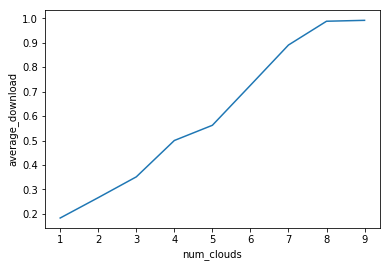

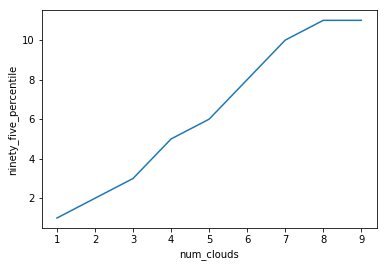

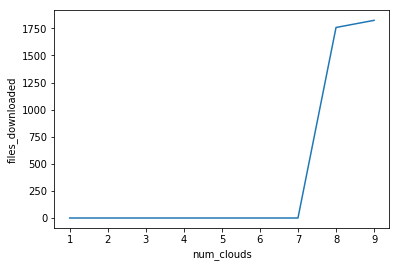

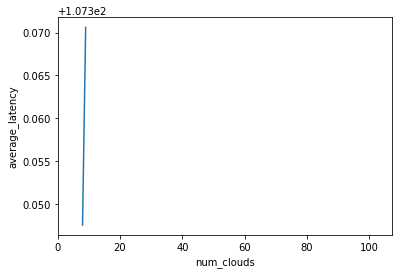

In [46]:
vp.plot_results(results_df)

In [47]:
results_max_bandwith = simulator.simulation_by_number_of_clouds(micro_clouds,MICROCLOUD_RANGE,step=1,bandwith=5)

INFO:root:Starting simulation with 1 num of clouds
INFO:root:Finished setup started simulation with 1 microclouds
INFO:root:Starting simulation with 2 num of clouds
INFO:root:Finished setup started simulation with 2 microclouds
INFO:root:Starting simulation with 3 num of clouds
INFO:root:Finished setup started simulation with 3 microclouds
INFO:root:Starting simulation with 4 num of clouds
INFO:root:Finished setup started simulation with 4 microclouds
INFO:root:Starting simulation with 5 num of clouds
INFO:root:Finished setup started simulation with 5 microclouds
INFO:root:Starting simulation with 6 num of clouds
INFO:root:Finished setup started simulation with 6 microclouds
INFO:root:Starting simulation with 7 num of clouds
INFO:root:Finished setup started simulation with 7 microclouds
INFO:root:Starting simulation with 8 num of clouds
INFO:root:Finished setup started simulation with 8 microclouds
INFO:root:Starting simulation with 9 num of clouds
INFO:root:Finished setup started simu

In [48]:
results_max_df = pd.DataFrame(results_max_bandwith,columns=['num_clouds','average_download','ninety_five_percentile','files_downloaded','average_latency'])

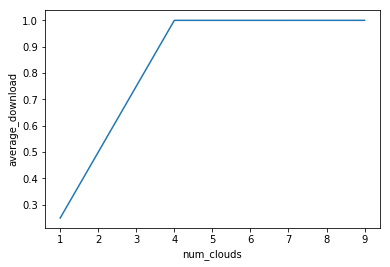

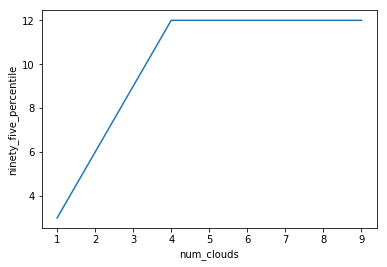

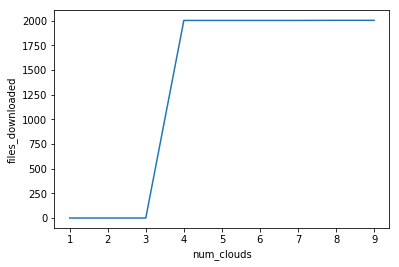

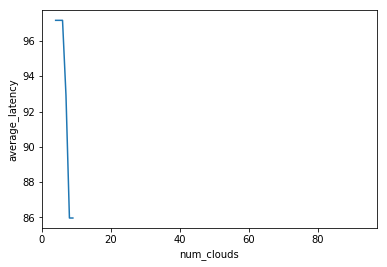

In [49]:
vp.plot_results(results_max_df)

In [107]:
distance = int(MICROCLOUD_RANGE*1.5)
beggining_distance = distance

In [104]:
uniform_coords = [(x,0) for x in range(beggining_distance,500,distance)] + [(500,y) for y in range(beggining_distance,500,distance)] + [(x,500) for x in range(500-beggining_distance,0,-distance)]+[(0,y) for y in range(500-beggining_distance,0,-distance)]

In [105]:
len(uniform_coords)

12

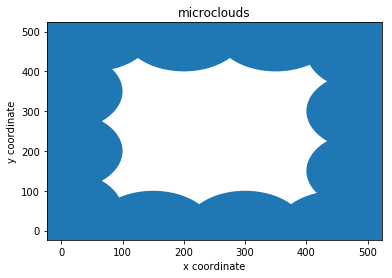

In [108]:
vp.plot_microclouds(uniform_coords,MICROCLOUD_RANGE,coords_x,coords_y)

In [109]:
uniform_config_file = 'uniform_config.csv'

In [110]:
vp.store_microcloud_config(uniform_coords,uniform_config_file)

In [111]:
results_uniform = simulator.simulation_by_number_of_clouds(uniform_coords,MICROCLOUD_RANGE,step=1,bandwith=1)

INFO:root:Starting simulation with 1 num of clouds
INFO:root:Finished setup started simulation with 1 microclouds
INFO:root:Starting simulation with 2 num of clouds
INFO:root:Finished setup started simulation with 2 microclouds
INFO:root:Starting simulation with 3 num of clouds
INFO:root:Finished setup started simulation with 3 microclouds
INFO:root:Starting simulation with 4 num of clouds
INFO:root:Finished setup started simulation with 4 microclouds
INFO:root:Starting simulation with 5 num of clouds
INFO:root:Finished setup started simulation with 5 microclouds
INFO:root:Starting simulation with 6 num of clouds
INFO:root:Finished setup started simulation with 6 microclouds
INFO:root:Starting simulation with 7 num of clouds
INFO:root:Finished setup started simulation with 7 microclouds
INFO:root:Starting simulation with 8 num of clouds
INFO:root:Finished setup started simulation with 8 microclouds
INFO:root:Starting simulation with 9 num of clouds
INFO:root:Finished setup started simu

In [112]:
uniform_df = pd.DataFrame(results_uniform,columns=['num_clouds','average_download','ninety_five_percentile','files_downloaded','average_latency'])

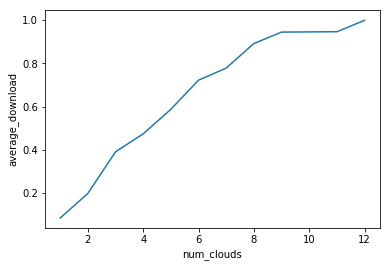

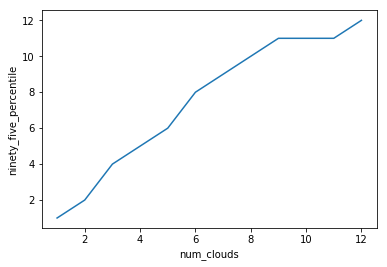

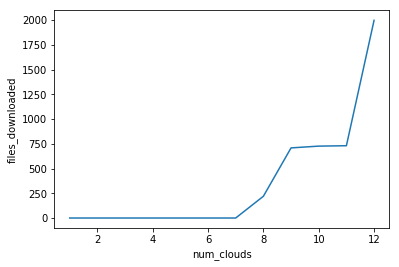

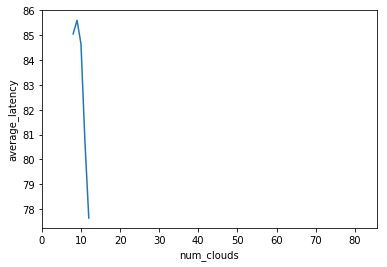

In [113]:
vp.plot_results(uniform_df)

In [114]:
results_uniform_max = simulator.simulation_by_number_of_clouds(uniform_coords,MICROCLOUD_RANGE,step=1,bandwith=5)

INFO:root:Starting simulation with 1 num of clouds
INFO:root:Finished setup started simulation with 1 microclouds
INFO:root:Starting simulation with 2 num of clouds
INFO:root:Finished setup started simulation with 2 microclouds
INFO:root:Starting simulation with 3 num of clouds
INFO:root:Finished setup started simulation with 3 microclouds
INFO:root:Starting simulation with 4 num of clouds
INFO:root:Finished setup started simulation with 4 microclouds
INFO:root:Starting simulation with 5 num of clouds
INFO:root:Finished setup started simulation with 5 microclouds
INFO:root:Starting simulation with 6 num of clouds
INFO:root:Finished setup started simulation with 6 microclouds
INFO:root:Starting simulation with 7 num of clouds
INFO:root:Finished setup started simulation with 7 microclouds
INFO:root:Starting simulation with 8 num of clouds
INFO:root:Finished setup started simulation with 8 microclouds
INFO:root:Starting simulation with 9 num of clouds
INFO:root:Finished setup started simu

In [115]:
uniform_max_df = pd.DataFrame(results_uniform_max,columns=['num_clouds','average_download','ninety_five_percentile','files_downloaded','average_latency'])

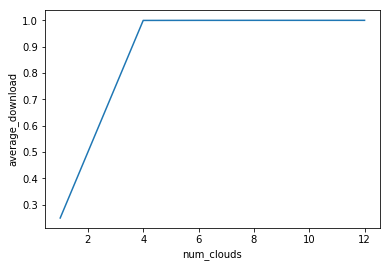

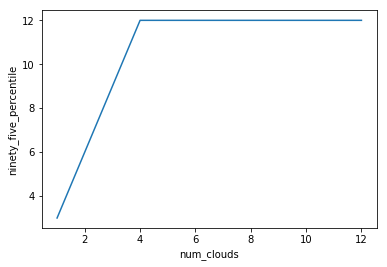

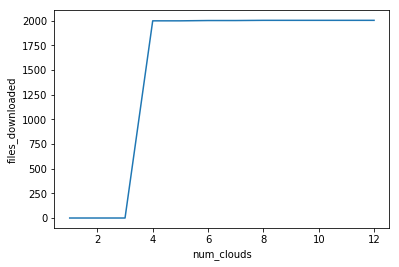

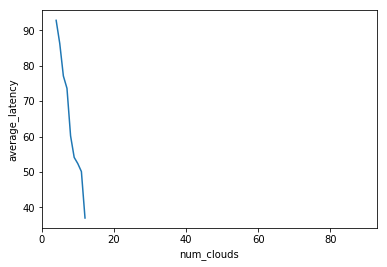

In [116]:
vp.plot_results(uniform_max_df)